# This is the Boston datasets that I will use for my prediction

In [1]:
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
(train_data, train_labels),(test_data, test_labels) =boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
train_labels.shape

(404,)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_labels

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [0]:
mean =train_data.mean(axis =0)
std  =train_data.std(axis =0)
train_data =train_data - mean
train_data =train_data /std

test_data =test_data -mean
test_data =test_data / std


# We build our model

In [0]:
def build_model():
  model_1 =models.Sequential()
  model_1.add(layers.Dense(64, activation='relu', input_shape =(train_data.shape[1],)))
  model_1.add(layers.Dense(64, activation ='relu'))
  model_1.add(layers.Dense(1))
  model_1.compile(optimizer ='rmsprop', loss='mse', metrics=['mae'])
  return model_1

#model =build_model()


In [0]:
 k =4
 num_val_samples =len(train_data) // k
 all_score =[]
 all_mae_scores =[]

In [10]:
for i in range(k):
  print('Processing folds is #',i)
  val_data =train_data[i * num_val_samples:(i +1) * num_val_samples]
  val_labels =train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data   = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_labels = np.concatenate([train_labels[:i * num_val_samples], train_labels[(i + 1) * num_val_samples:]])

Processing folds is # 0
Processing folds is # 1
Processing folds is # 2
Processing folds is # 3


In [0]:
model = build_model()
network_1 =model.fit(partial_train_data, partial_train_labels, epochs=500, batch_size=1, verbose =0)
val_mse, val_mae =(val_data, val_labels)
all_score.append(val_mae)
all_scores.append(val_mse)

In [0]:
network_1_dict =network_1.history

In [53]:
network_1_dict

{'loss': [180.7093756834143,
  24.65003835051145,
  17.2843226385956,
  14.057005303202471,
  12.926815602001987,
  12.11316642118349,
  12.051883049946753,
  11.460424809786952,
  11.245364011461092,
  10.778014227452653,
  10.618291062319889,
  9.831666169497538,
  10.154123824944342,
  9.756128800371101,
  9.16526825584941,
  9.293100086272808,
  9.44883987811369,
  9.073372849114563,
  9.20575374180644,
  8.947950037049427,
  8.731468187349284,
  8.733737786930535,
  8.39872256030897,
  8.313292563061474,
  8.180533978154921,
  8.278472989889911,
  7.774470273654521,
  7.617304566215452,
  7.765341313600021,
  7.027774968129937,
  7.496967645603159,
  6.922333049948078,
  7.414377019737471,
  7.186468136071427,
  6.546222231865139,
  6.890706542313043,
  6.7138641456003105,
  6.563629295569716,
  6.570351351153161,
  6.746525656036995,
  6.5690440958563405,
  6.5343581010034875,
  5.939328301309498,
  6.235863499591318,
  5.726509543370754,
  6.452573878854333,
  5.974924213585519,

In [54]:
network_1_dict.keys()

dict_keys(['loss', 'mae'])

In [0]:
myloss =network_1_dict['loss']
mymae  =network_1_dict['mae']

Text(0, 0.5, 'Training Losses')

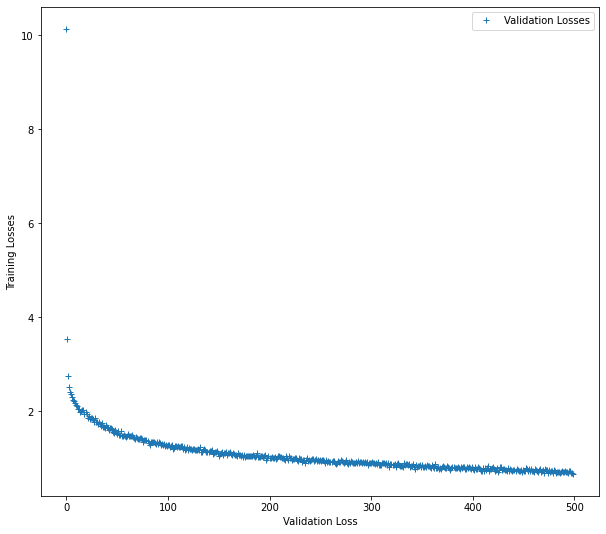

In [62]:
plt.figure(figsize =(10, 9))
#plt.plot(myloss,  label='Training Losses')
plt.plot(mymae,'+', label=('Validation Losses'))
plt.legend()
plt.xlabel('Validation Loss')
plt.ylabel('Training Losses')


In [0]:
y_predict =model.predict(test_data)

In [58]:
print(y_predict)

[[ 9.579979 ]
 [18.055157 ]
 [19.650724 ]
 [32.67381  ]
 [21.52849  ]
 [22.870605 ]
 [28.271847 ]
 [20.791185 ]
 [19.115328 ]
 [20.754011 ]
 [19.27989  ]
 [17.924826 ]
 [15.269965 ]
 [45.8395   ]
 [23.099049 ]
 [23.391062 ]
 [23.261827 ]
 [22.468355 ]
 [19.966618 ]
 [35.220062 ]
 [14.582834 ]
 [11.076789 ]
 [19.832685 ]
 [18.228205 ]
 [22.773375 ]
 [23.816706 ]
 [33.033775 ]
 [24.701044 ]
 [12.568216 ]
 [22.116133 ]
 [20.532694 ]
 [20.042486 ]
 [26.441385 ]
 [22.324942 ]
 [21.197807 ]
 [ 5.9271283]
 [19.769203 ]
 [19.443129 ]
 [25.210981 ]
 [24.35497  ]
 [33.802628 ]
 [26.149221 ]
 [14.671189 ]
 [46.748245 ]
 [30.960627 ]
 [25.256403 ]
 [26.54901  ]
 [19.782442 ]
 [18.998787 ]
 [22.77871  ]
 [27.663424 ]
 [21.623419 ]
 [11.965486 ]
 [13.698934 ]
 [35.70108  ]
 [29.052256 ]
 [10.014681 ]
 [51.02679  ]
 [29.598251 ]
 [26.458834 ]
 [21.588842 ]
 [12.745256 ]
 [19.923996 ]
 [20.997093 ]
 [23.611544 ]
 [21.656721 ]
 [15.585041 ]
 [21.733503 ]
 [13.422592 ]
 [ 8.104053 ]
 [32.507538 ]
 [28.2